In [1]:
from RRI import *
import matplotlib.pyplot as plt
import h5py
from datetime import datetime
import pandas as pd
import numpy as np
import math as mt
from math import sqrt
%matplotlib inline

In [2]:
fn_=RRI("RRI_20150401_033844_034241_lv1_12.0.0.h5")

In [4]:
time=fn_.epop_met 
am1_=fn_.m1_mV
m1_=fn_.m1_mV
m2_=fn_.m2_mV
m3_=fn_.m3_mV
m4_=fn_.m4_mV
time=fn_.epop_met
geo_lat=fn_.glat_
geo_lon=fn_.glon_
alt=fn_.alt_
freq_1=fn_.d1_freq
fs=fn_.fs_

In [5]:
from scipy.interpolate import interp1d

x=np.linspace(0,237,num=238,endpoint=True)
y=fn_.epop_met
y1=fn_.glat_
y2=fn_.glon_
y3=fn_.alt_
#f=interp1d(x,y)
f2=interp1d(x,y,kind='linear')
f3=interp1d(x,y1,kind='linear')
f4=interp1d(x,y2,kind='linear')
f5=interp1d(x,y3,kind='linear')
xnew=np.linspace(0,237,num=14810126,endpoint=True)

In [6]:
time=f2(xnew)
geo_lat=f3(xnew)
geo_lon=f4(xnew)
alt=f5(xnew)

In [7]:
time2=[]
for i in range(len(time)):
    dt_obj1 = pd.to_datetime(time[i], unit='s',origin='1968-05-24')
    time2.append(dt_obj1)
df2 = pd.DataFrame (time2, columns = ['time'])
time_1=pd.to_datetime(df2['time'],format='%Y-%m-%d %H:%M:%S.%f')

In [8]:
loc_nan=np.isnan(m1_)
m1_[loc_nan]=0

loc_nan=np.isnan(m2_)
m2_[loc_nan]=0

loc_nan=np.isnan(m3_)
m3_[loc_nan]=0

loc_nan=np.isnan(m4_)
m4_[loc_nan]=0

In [9]:
diapole_1=m1_+1j*m2_
diapole_2=m3_+1j*m4_

v1=abs(diapole_1) #amplitude of diapole 1
v2=abs(diapole_2)  #amplitude of diapole 2

(0.0, 16.0)

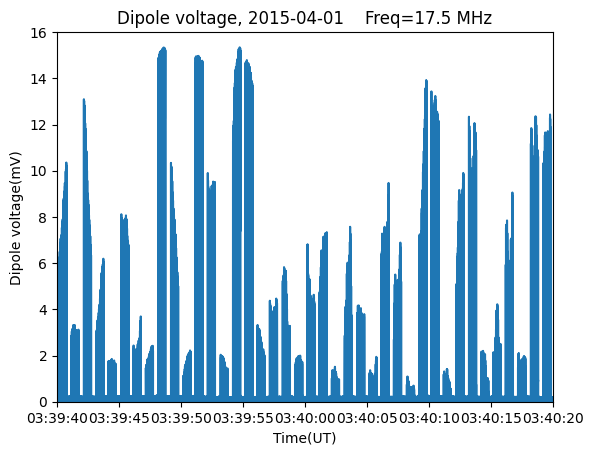

In [10]:
plt.plot(time_1,v1)
plt.xlim(left=pd.Timestamp('2015-04-01 03:39:40'),right=pd.Timestamp('2015-04-01 03:40:20'))
plt.xlabel('Time(UT)')
plt.ylabel('Dipole voltage(mV)')
plt.title('Dipole voltage, 2015-04-01    Freq=17.5 MHz')
plt.ylim(0,16)

In [11]:
from scipy.signal import find_peaks

In [12]:
#finding the pulse present in the signal of diapole 1 and 2
#pks_1=find_peaks(v1)
pks_1=DARN_pulse_seeker(v1)
pks_2=DARN_pulse_seeker(v2)
x=pks_1[0]
y=pks_2[0]

Text(0.5, 1.0, 'April 1,2015-dipole voltage')

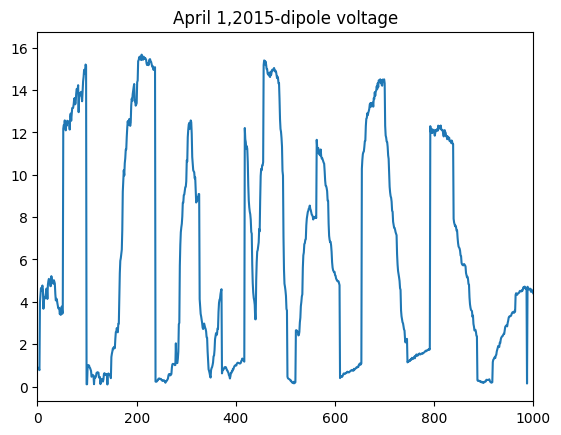

In [13]:
plt.plot(v1[x])
plt.xlim(0,1000)
plt.title('April 1,2015-dipole voltage')

In [14]:
##scintillation s4 for diapole v1

In [15]:
def from_3d_numpy_to_2d_array(X):
    array_2d = X.reshape(X.shape[0], -1)
    return array_2d

In [16]:
#getting 20 data on either side of pulse position 

pulse1=[]
pulse_position=[]
for i in range(len(x)):
                 df_v1=pd.DataFrame(v1)
                 v_1=(df_v1.iloc[x[i]-20:x[i]+20]).reset_index(drop=True)
                 exclude_positions=range(x[i]-20,x[i]+20,1)
                 pulse1.append(v_1)
                 pulse_position.append(exclude_positions)


In [17]:
noise_data=[]
for i in range(len(x)):
          v1_noise=(df_v1.iloc[x[i]+25:x[i]+45]).reset_index(drop=True)
          noise_data.append(v1_noise)
          

In [18]:
noise=np.array(noise_data)
n2=from_3d_numpy_to_2d_array(noise)

In [19]:
#converting 3D array into 2D array

g=np.array(pulse1)
n1=from_3d_numpy_to_2d_array(g)
print(n1.shape)

(10411, 40)


In [20]:
#s4 calclatin1on new approach

In [21]:
#finding runnig sum of data and find the position of maximum sum of set of data
ls=[]
list_new=[]
for k in range(len(n1)):
                 sub_n1=n1[k]
                 for i in range(31):
                                  j=0
                                  sublist=sub_n1[i+j:i+j+10]
                                  
                                  #sublist1=np.array(sublist1)
                                  list_new.append(sublist)
                                                


In [22]:
#splititng dataset and finding maximum sum of set of data
list_new=np.array(list_new)
arr2 = np.split(list_new, 10411, axis=0)
extract=[]
for m in range(10411):
                 nj=arr2[m]
                 sum1=np.sum(nj,axis=1)
                 sum1=np.array(sum1)
                 n0=sum1.argmax()
                 sublist3=nj[n0]
                 extract.append(sublist3)

In [23]:
newextract=[]
for h in range(len(n1)):
                 m=(extract[h]).tolist()
                 newextract.append(m)
                 

In [24]:
pos=[]
for u in range(len(n1)):
                 indices = [i for i, x in enumerate(n1[u]) for p , y in enumerate(extract[u]) if x==y]
                 pos.append(indices)
                 
                 

In [25]:
for u in range(len(n1)):
                 for i in range(len(pos[u])-2):
                                  if (pos[u][i + 1] - pos[u][i])>1:
                                                   del pos[u][i]
                                  

In [26]:
#creating nan list 

a = np.empty((10411,40))
a[:] = np.nan
a.tolist()
newa=[]
for k in range(10411):
                 no=(a[k]).tolist()
                 newa.append(no)

In [27]:
for i in range(10411):
                 for k in range(10):
                                  posi=[val for w, val in enumerate(pos[i])]
                                  dat=[value for q,value in enumerate(newextract[i])]
                                  #newa[i].insert(posi[k],dat[k])
                                  newa[i][posi[k]]=dat[k]

In [28]:
extract2=np.array(extract)
extract1=extract2**2

In [29]:
#calculating s4

s4_new_let=[]
for i in range(len(extract1)):
    s4=sqrt((np.nanmean((extract1[i])**2)-(np.nanmean(extract1[i]))**2)/(np.nanmean(extract1[i]))**2)
    s4_new_let.append(s4)

In [30]:
s4_new_let=[]
for i in range(len(extract1)):
    s4=sqrt((np.nanmean((extract1[i])**2)-(np.nanmean(extract1[i]))**2)/(np.nanmean(extract1[i]))**2)
    s4_new_let.append(s4)

In [31]:
len(s4_new_let)

10411

In [32]:
#finding exact time....

In [33]:
time_pulse1=[]
for i in range(len(x)):
                 timeframe=pd.DataFrame(time,index=None)
                 t_1=(timeframe.iloc[x[i]-20:x[i]+20]).reset_index(drop=True)
                 time_pulse1.append(t_1)

In [34]:
time_pulse1=np.array(time_pulse1)

In [35]:
#time in micrsecond

time_micro=time_pulse1/10**(-6)
real_time=[]
for i in range(10411):
                 real_time1=time_micro[i]-time_micro[i][0]
                 real_time.append(real_time1)
                 

In [36]:
time_extract=[]
for i in range(10411):
                 c=time_pulse1[i][pos[i]]
                 time_extract.append(c)

In [37]:

middle_index=[]
for u in range(10411):
                 nu=time_extract[u][int(len(time_extract[u])/2)]
                 middle_index.append(nu)

In [38]:
middle_index=pd.DataFrame(middle_index)

In [39]:
time_for_s4_new=[]
for i in range(len(middle_index[0])):
    dt_obj1 = pd.to_datetime(middle_index[0][i], unit='s',origin='1968-05-24')
    time_for_s4_new.append(dt_obj1)
df2 = pd.DataFrame (time_for_s4_new, columns = ['time'])
time_real=pd.to_datetime(df2['time'],format='%Y-%m-%d %H:%M:%S.%f')

Text(0.5, 0, 'time(UT)')

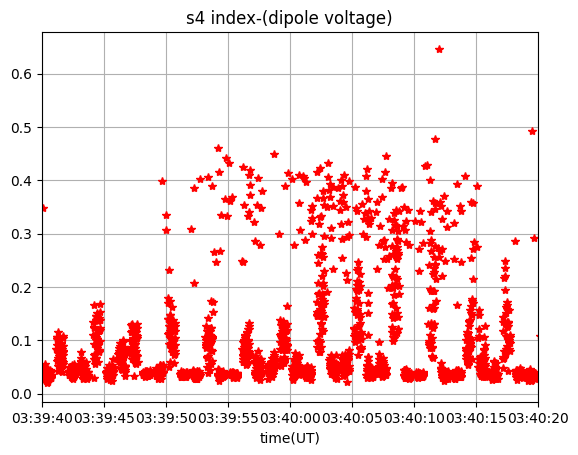

In [63]:
plt.plot(time_1[x][0:10000],s4_new_let[0:10000],'r*')
#plt.plot(time_1[x][0:10000],s4_new_let[0:10000])
plt.xlim(left=pd.Timestamp('2015-04-01 03:39:40'),right=pd.Timestamp('2015-04-01 03:40:20'))
#plt.ylim(0,0.5)
plt.title('s4 index-(dipole voltage)')
plt.grid(True)
#plt.xlim(4000,4200)
plt.xlabel('time(UT)')

Text(0.5, 1.0, '2015-04-01 03:38:44.80')

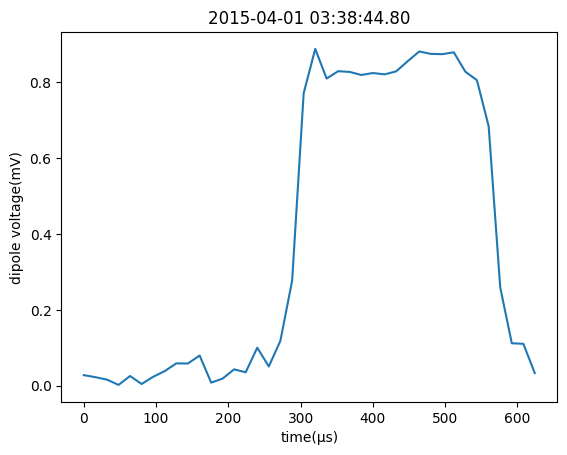

In [41]:
plt.plot(real_time[0],n1[0])
plt.xlabel('time(μs)')
plt.ylabel('dipole voltage(mV)')
plt.title("2015-04-01 03:38:44.80")

Text(0.5, 1.0, '2015-04-01 03:38:44.80')

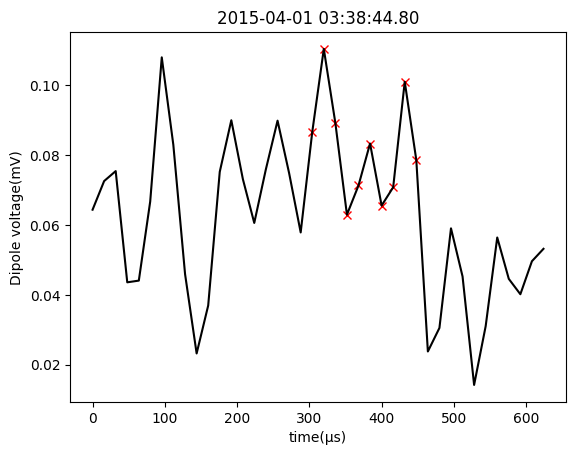

In [99]:
plt.plot(real_time[114],newa[114],'x',color='r')
plt.plot(real_time[114],n1[114],color='black')
plt.xlabel('time(μs)')
plt.ylabel('Dipole voltage(mV)')
plt.title("2015-04-01 03:38:44.80")

In [53]:
#calculating SNR
def signal_power(signal_data):
    return np.sum(signal_data ** 2) / len(signal_data)
    
def noise_power(noise_data):
    noise = noise_data
    return np.sum(noise ** 2) / len(noise)

In [140]:

#finding signal to noise ration(SNR)
SNR=[]
pos_signal_less_then_10=[]
for i in range(len(n1)):
          x1=(signal_power(extract2[i])-noise_power(n2[i])) / noise_power(n2[i]) #extract2 is datapoint from top of pulse and n2 is
          snr = 10*np.log10(x1)
          if snr<10:
                    pos_signal_less_then_10.append(i)
          if snr>=10:
                    SNR.append(snr)
SNR=np.array(SNR)
s_nan=np.isnan(SNR)
SNR[s_nan]=0
df_SNR=pd.DataFrame(SNR)
df_SNR.interpolate()
pos_signal_less_then_10=np.array(pos_signal_less_then_10)

In [139]:
for i in range(len(pos_signal_less_then_10)):
    fig, ax = plt.subplots()
    ax.plot(n1[pos_signal_less_then_10[i]])
    fig.savefig(f'/Users/subodhdahal/desktop/cod/scintillation_s4_project/plots/figure{i+1}.png')
    plt.close()

In [144]:
np.savetxt('/Users/subodhdahal/desktop/cod/scintillation_s4_project/position.txt',pos_signal_less_then_10, fmt='%d')

Text(0.5, 0, 'time(UT)')

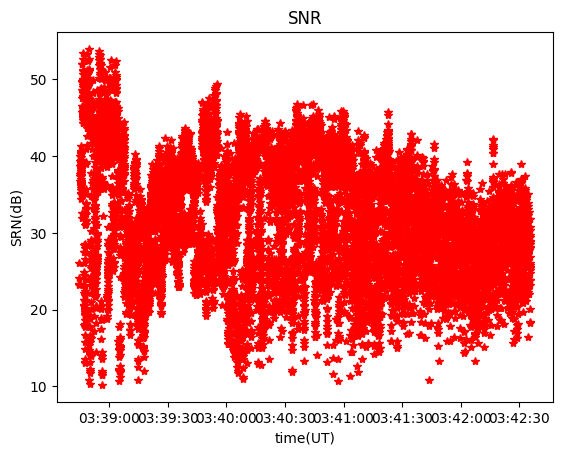

In [108]:
plt.plot(time_1[x][0:10186],df_SNR[0:10186],'r*')
#plt.plot(time_1[x][0:10186],df_SNR[0:10186])
#plt.xlim(left=pd.Timestamp('2015-04-01 03:39:40'),right=pd.Timestamp('2015-04-01 03:40:20'))
plt.title("SNR")
#plt.xlim(200,400)
plt.ylabel("SRN(dB)")
plt.xlabel("time(UT)")

In [87]:
#s4 scintillation using SNR
SNR=np.array(df_SNR[0])
s4_SNR=[]
for i in range(len(SNR)):
          SNR_s4=(sqrt(np.nanmean((SNR[i]-np.nanmean(SNR))**2)))/(np.nanmean(SNR))
          s4_SNR.append(SNR_s4)

Text(0.5, 0, 'time(UT)')

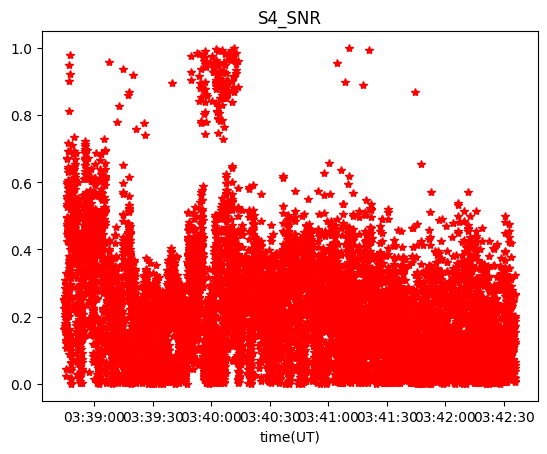

In [88]:
plt.plot(time_1[x][0:10186],s4_SNR[0:10186],'r*')
#plt.plot(time_1[x][0:10186],s4_SNR[0:10186])
#plt.xlim(left=pd.Timestamp('2015-04-01 03:39:40'),right=pd.Timestamp('2015-04-01 03:40:20'))
plt.title("S4_SNR")
plt.xlabel("time(UT)")

In [ ]:
#